<a href="https://colab.research.google.com/github/hannah-anonuevo/Global-Health-Demographic-Analysis/blob/main/Global_Health_Demographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Data Cleansing

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")
sns.set_context("poster")
pd.options.display.float_format =  '{:.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Health_Data.xlsx",header=0)
df_FE = df
df.head()

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.rename(columns={'Unnamed: 1': 'Date'}, inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.at[0, 'Date'] = '2020-02-24'
df.at[1, 'Date'] = '2020-02-25'

In [ ]:
df.head()

,location,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,2020-02-24,1.00,1.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,38928341.00,54.42,18.60,2.58,1.34,1803.99,0.00,597.03,9.59,37.75,0.50,64.83,0.51
1,Afghanistan,2020-02-25,1.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,38928341.00,54.42,18.60,2.58,1.34,1803.99,0.00,597.03,9.59,37.75,0.50,64.83,0.51
2,Afghanistan,2020-02-26,1.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,38928341.00,54.42,18.60,2.58,1.34,1803.99,0.00,597.03,9.59,37.75,0.50,64.83,0.51
3,Afghanistan,2020-02-27,1.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,38928341.00,54.42,18.60,2.58,1.34,1803.99,0.00,597.03,9.59,37.75,0.50,64.83,0.51
4,Afghanistan,2020-02-28,1.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,38928341.00,54.42,18.60,2.58,1.34,1803.99,0.00,597.03,9.59,37.75,0.50,64.83,0.51


II. Aggregation

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
totalpopulation_df = df.groupby('location').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'population': 'mean'
})
totalpopulation_df.rename(columns={'new_cases': 'total_cases', 'new_deaths': 'total_deaths'}, inplace=True)

In [ ]:
totalpopulation_df

,total_cases,total_deaths,population
location,,,
Afghanistan,58542.00,2565.00,38928341.00
Africa,4487054.00,119604.00,1340598113.00
Albania,130270.00,2367.00,2877800.00
Algeria,120562.00,3190.00,43851043.00
Andorra,13007.00,123.00,77265.00
Angola,25279.00,574.00,32866268.00
Anguilla,0.00,0.00,15002.00
Antigua and Barbuda,1222.00,31.00,97928.00
Argentina,2824652.00,61176.00,45195777.00


**The following chart will only include the top 10 locations with the highest total cases, excluding the world**




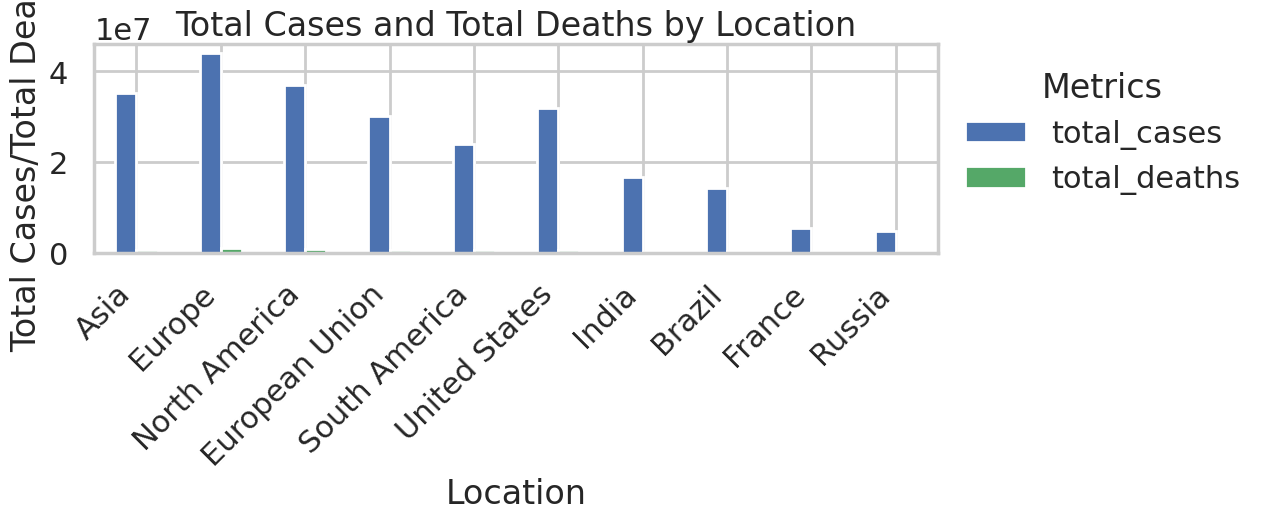

In [ ]:
Agg1 = {
    'total_cases': [35278830, 43930132, 37051724, 30029207, 24025461, 31991749, 16610481, 14237078, 5502014, 4691290],
    'total_deaths': [486120, 995899.00, 839500.00, 674331.00, 643957.00, 571197.00, 189544.00, 386416.00, 102655.00, 105718.00]
}
index_labels = ['Asia', 'Europe', 'North America', 'European Union', 'South America', 'United States', 'India', 'Brazil', 'France', 'Russia']

agg1_df = pd.DataFrame(Agg1, index=index_labels)

fig, ax = plt.subplots(figsize=(10, 6))
agg1_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(agg1_df.index, rotation=45, ha='right')
ax.set_xlabel('Location')
ax.set_ylabel('Total Cases/Total Deaths')
ax.set_title('Total Cases and Total Deaths by Location')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**The following chart will be based on the top 11 locations with the highest total deaths, including the world total**

In [ ]:
comorbidities_df = df.groupby('location').agg({
    'diabetes_prevalence': 'mean',
    'cardiovasc_death_rate': 'mean',
    'new_deaths': 'sum',
})
comorbidities_df.rename(columns={'new_deaths': 'total_deaths'}, inplace=True)

In [ ]:
comorbidities_df

,diabetes_prevalence,cardiovasc_death_rate,total_deaths
location,,,
Afghanistan,9.59,597.03,2565.00
Africa,0.00,0.00,119604.00
Albania,10.08,304.19,2367.00
Algeria,6.73,278.36,3190.00
Andorra,7.97,109.14,123.00
Angola,3.94,276.05,574.00
Anguilla,0.00,0.00,0.00
Antigua and Barbuda,13.17,191.51,31.00
Argentina,5.50,191.03,61176.00


In [ ]:
highest_deaths_df = pd.DataFrame({
    'total_deaths': [2565.00, 119604.00, 2367.00, 3190.00, 123.00, 574.00, 0.00, 31.00, 61176.00, 3984.00, 0.00, 486120.00, 910.00, 10055.00, 4307.00, 196.00, 617.00, 10869.00, 44.00, 2473.00, 23954.00, 321.00, 97.00, 0.00, 1.00, 12783.00, 8203.00, 691.00, 386416.00, 3.00, 15826.00, 156.00, 6.00, 61.00, 991.00, 23870.00, 201.00, 0.00, 85.00, 169.00, 25641.00, 4827.00, 70446.00, 146.00, 139.00, 3136.00, 279.00, 6784.00, 569.00, 0.00, 297.00, 28863.00, 752.00, 2473.00, 132.00, 0.00, 3448.00, 18062.00, 12959.00, 2093.00, 107.00, 10.00, 1126.00, 671.00, 3511.00, 995899.00, 674331.00, 0.00, 0.00, 2.00, 903.00, 102655.00, 138.00, 173.00, 3992.00, 81492.00, 777.00, 0.00, 9864.00, 0.00, 1.00, 7374.00, 0.00, 139.00, 66.00, 277.00, 251.00, 5095.00, 0.00, 26208.00, 29.00, 189544.00, 44346.00, 15.00, 68746.00, 15174.00, 4867.00, 0.00, 6346.00, 118699.00, 752.00, 9834.00, 0.00, 8514.00, 3304.00, 2583.00, 2115.00, 1502.00, 1573.00, 0.00, 2094.00, 7090.00, 316.00, 85.00, 2947.00, 57.00, 3833.00, 790.00, 0.00, 588.00, 1145.00, 1415.00, 71.00, 460.00, 412.00, 0.00, 454.00, 16.00, 214504.00, 0.00, 5691.00, 31.00, 74.00, 1457.00, 0.00, 8983.00, 806.00, 3206.00, 622.00, 0.00, 3122.00, 17245.00, 26.00, 181.00, 191.00, 2061.00, 839500.00, 4628.00, 0.00, 736.00, 1038.00, 1942.00, 16842.00, 3138.00, 6200.00, 99.00, 5715.00, 59012.00, 16529.00, 64707.00, 16957.00, 413.00, 27113.00, 105718.00, 328.00, 0.00, 0.00, 70.00, 10.00, 0.00, 89.00, 35.00, 6878.00, 1097.00, 6164.00, 26.00, 79.00, 30.00, 11405.00, 4195.00, 0.00, 689.00, 54066.00, 643957.00, 1812.00, 114.00, 77591.00, 634.00, 2300.00, 193.00, 13923.00, 10566.00, 1510.00, 11.00, 90.00, 21.00, 121.00, 3.00, 121.00, 0.00, 157.00, 10170.00, 37672.00, 0.00, 341.00, 43483.00, 1567.00, 127638.00, 571197.00, 2227.00, 641.00, 1.00, 0.00, 2009.00, 35.00, 3086133.00, 1165.00, 1245.00, 1556.00]
}, index=['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cote d Ivoire', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North America', 'North Macedonia', 'Northern Cyprus', 'Norway', 'Oceania', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South America', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turks and Caicos Islands', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe'])

highest_deaths = highest_deaths_df.nlargest(11, 'total_deaths')
print(highest_deaths)

                total_deaths
World             3086133.00
Europe             995899.00
North America      839500.00
European Union     674331.00
South America      643957.00
United States      571197.00
Asia               486120.00
Brazil             386416.00
Mexico             214504.00
India              189544.00
United Kingdom     127638.00


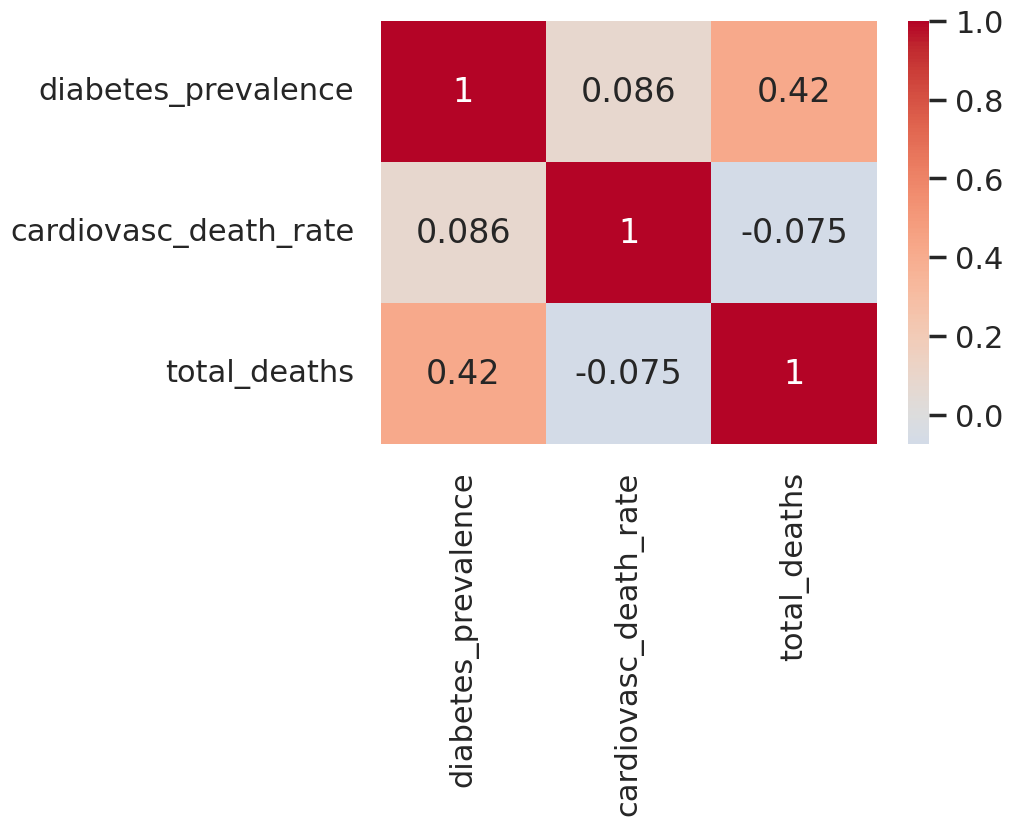

In [ ]:
Agg2 = {
    'diabetes_prevalence': [10.79, 8.11, 10.39, 13.06, 4.28, 4.78, 5.72, 7.17, 6.18, 8.31, 5.5],
    'cardiovasc_death_rate': [151.09, 177.96, 282.28, 152.78, 122.14, 113.15, 86.06, 99.40, 431.30, 156.14, 191.03],
    'total_deaths': [3086133.00, 386416.00, 189544.00, 214504.00, 127638.00, 118699.00, 9834.00, 77591.00, 105718.00, 81492.00, 61176.00]
}
index_labels = ['World', 'Brazil', 'India', 'Mexico', 'United Kingdom', 'Italy', 'Japan', 'Spain', 'Russia', 'Germany', 'Argentina']

comorbidities_df = pd.DataFrame(Agg2, index=index_labels)

correlation_matrix = comorbidities_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
age_df = df.groupby('location').agg({
    'aged_70_older': 'mean',
    'new_deaths': 'sum',
})
age_df.rename(columns={'new_deaths': 'total_deaths'}, inplace=True)

In [ ]:
age_df

,aged_70_older,total_deaths
location,,
Afghanistan,1.34,2565.00
Africa,0.00,119604.00
Albania,8.64,2367.00
Algeria,3.86,3190.00
Andorra,0.00,123.00
Angola,1.36,574.00
Anguilla,0.00,0.00
Antigua and Barbuda,4.63,31.00
Argentina,7.44,61176.00


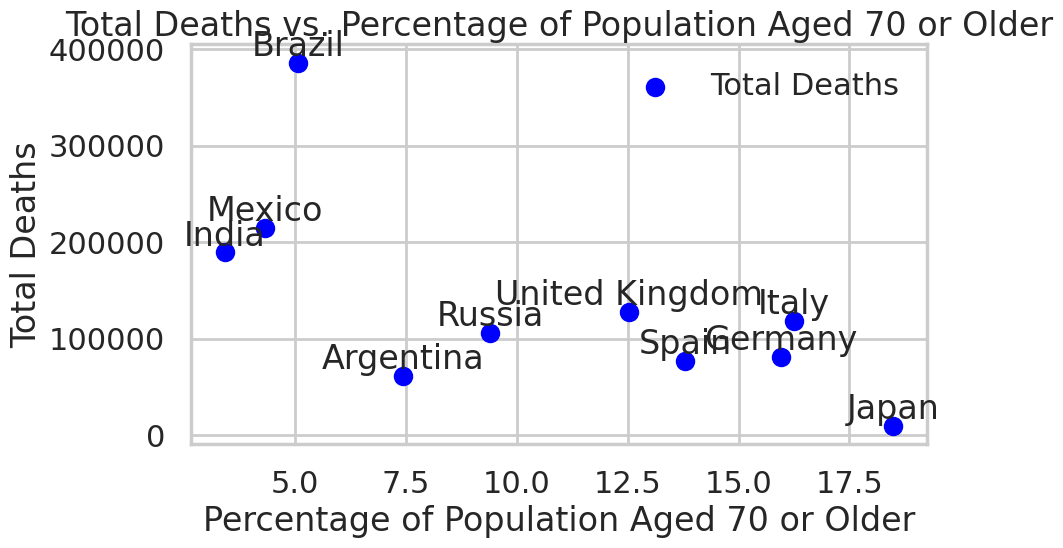

In [ ]:
Agg3 = {
    'aged_70_older': [5.06, 3.41, 4.32, 12.53, 16.24, 18.49, 13.80, 9.39, 15.96, 7.44],
    'total_deaths': [386416.00, 189544.00, 214504.00, 127638.00, 118699.00, 9834.00, 77591.00, 105718.00, 81492.00, 61176.00]
}

index_labels = ['Brazil', 'India', 'Mexico', 'United Kingdom', 'Italy', 'Japan', 'Spain', 'Russia', 'Germany', 'Argentina']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Agg3['aged_70_older'], Agg3['total_deaths'], marker='o', color='b', label='Total Deaths')

ax.set_xlabel('Percentage of Population Aged 70 or Older')
ax.set_ylabel('Total Deaths')
ax.set_title('Total Deaths vs. Percentage of Population Aged 70 or Older')
ax.legend()

for i, label in enumerate(index_labels):
    ax.annotate(label, (Agg3['aged_70_older'][i], Agg3['total_deaths'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.grid(True)
plt.tight_layout()
plt.show()

**The graph below is based on the Top 10 number of cases, excluding the world**

In [ ]:
vaccines_df = df.groupby('location').agg({
    'people_vaccinated': 'mean',
    'population': 'mean'
})

In [ ]:
vaccines_df

,people_vaccinated,population
location,,
Afghanistan,993.41,38928341.00
Africa,961527.18,1340598113.00
Albania,34.20,2877800.00
Algeria,0.00,43851043.00
Andorra,128.61,77265.00
Angola,2738.52,32866268.00
Anguilla,425.22,15002.00
Antigua and Barbuda,600.82,97928.00
Argentina,379302.46,45195777.00


<ipython-input-49-94f52e3f062f>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


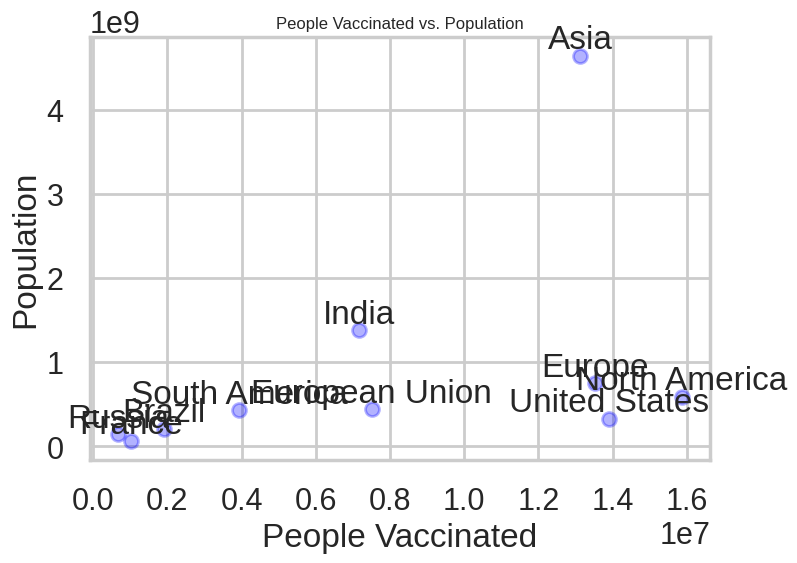

In [ ]:
Agg4 = {
    'people_vaccinated': [13118296.29, 13535429.72, 15862811.94, 7502133.22, 3935782.07, 13903025.44, 7157403.66, 1918834.97, 1032341.09, 678782.24],
    'population': [4639847425, 748680069, 592072204, 444919060, 430759772, 331002647, 1380004385, 212559409, 67147687, 145934460]
}

index_labels = ['Asia', 'Europe', 'North America', 'European Union', 'South America', 'United States', 'India', 'Brazil', 'France', 'Russia']
plt.scatter(Agg4['people_vaccinated'], Agg4['population'], s=100, c='blue', alpha=0.3)

for i in range(len(index_labels)):
    plt.annotate(index_labels[i], (Agg4['people_vaccinated'][i], Agg4['population'][i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.style.use('seaborn')
plt.xlabel('People Vaccinated')
plt.ylabel('Population')
plt.title('People Vaccinated vs. Population')

plt.grid(True)
plt.show()